In [1]:
import os, sys, pickle

import matplotlib.pyplot as plt
import numpy as np
import collections
%matplotlib inline 

import jp_mpl as jplot

from matplotlib.colors import LogNorm

In [2]:
pmt_info = pickle.load(open('/home/jpyanez/snoplus/snoplus_python/pmt_positions.pckl'))

In [112]:
outdir_base = '/home/jpyanez/snoplus/results/geometry_lb_comparisons'

In [205]:
exta_triggers = [264536,
49825,
48100,
48251,
48113,
48114,
48132]

runs = ['102529', # central
       '102552',  # central
        '102554', # central
        '102556', #-5500
        '102568', #-3000
        '102570', # 3000
        '102580', # 6000
       ]

In [206]:
index = 0
triggers = exta_triggers[index]
run = runs[index]

mc_triggers = 5000.

In [207]:
native_t0=391. # 390
data_t0 = 351.
nbins = 210

figsize = (14,9)

4730056.0


/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx2/Compiler/intel2016.4/python27-scipy-stack/2017a/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


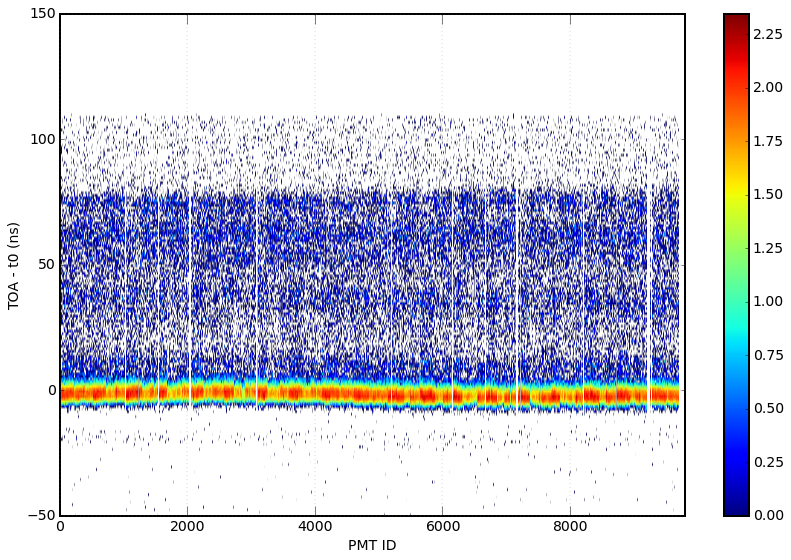

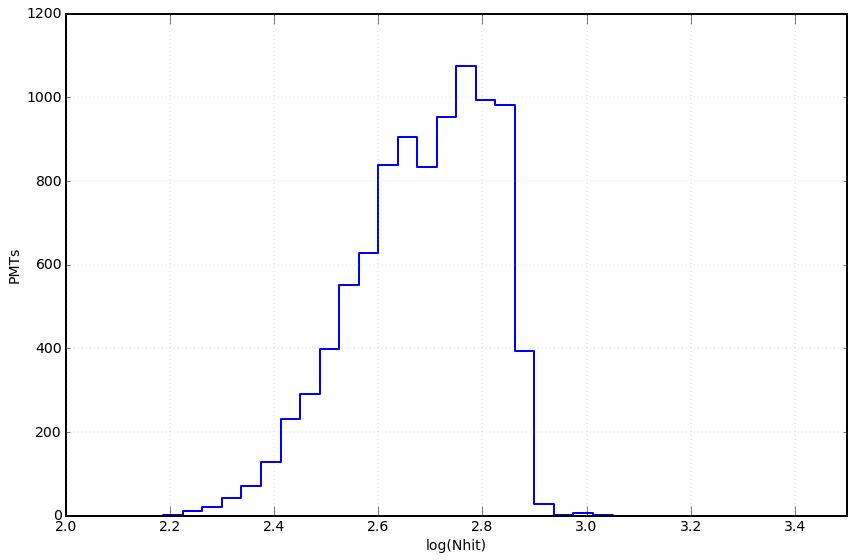

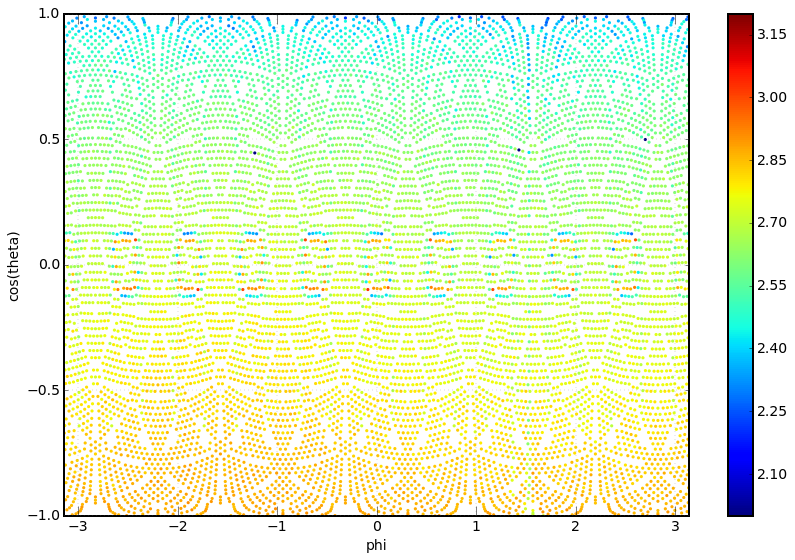

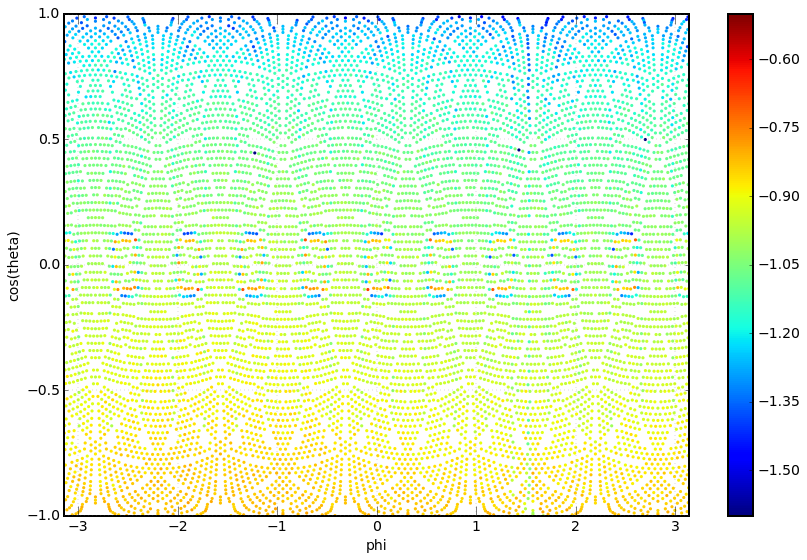

In [208]:
infile = '/home/jpyanez/snoplus/data/snoplus_mc/laserball/run_mc_native/'+run+'_TOA.pckl'
native = pickle.load(open(infile))
print np.sum(native['toa'])
fig = plt.figure(figsize=figsize)
plt.imshow(np.log10(native['toa'].T), aspect='auto', origin='lower',
          extent=[0, native['toa'].shape[0], 
                  native['time_edges'].min()-native_t0, 
                  native['time_edges'].max()-native_t0])
plt.ylim([-50, 150])
plt.xlabel('PMT ID')
plt.ylabel('TOA - t0 (ns)')
plt.colorbar()


sum_data = np.log10(native['toa'].sum(axis=1)+1)
nonzeroa  = (sum_data>0)
nonzerob  = nonzeroa[:pmt_info['phi'].size]
occ = np.log10((native['toa'].sum(axis=1)+1)/mc_triggers)

fig = plt.figure(figsize=figsize)
x = np.linspace(2, 3.5, 41)
b, x = np.histogram(sum_data[nonzeroa], x)
jplot.unfilledBar(x, b)
plt.xlabel('log(Nhit)')
plt.ylabel('PMTs')

fig = plt.figure(figsize=figsize)

#ax = fig.add_subplot(111, projection='mollweide')
plt.scatter(pmt_info['phi'][nonzerob], pmt_info['costheta'][nonzerob], s=10.,
           c = sum_data[nonzeroa],
           edgecolor='',
           vmin = 2., vmax=3.2)
plt.xlabel('phi')
plt.ylabel('cos(theta)')
plt.xlim(-np.pi, np.pi)
plt.ylim(-1,1)
plt.colorbar()

fig.savefig(os.path.join(outdir_base, run + '_hits_native.png'),dpi=200)

fig = plt.figure(figsize=figsize)
occ = np.log10((native['toa'].sum(axis=1)+1)/mc_triggers)
#ax = fig.add_subplot(111, projection='mollweide')
plt.scatter(pmt_info['phi'][nonzerob], pmt_info['costheta'][nonzerob], s=10.,
           c = occ[nonzeroa],
           edgecolor='',
           vmin = -1.6, vmax=-0.5)
plt.xlabel('phi')
plt.ylabel('cos(theta)')
plt.xlim(-np.pi, np.pi)
plt.ylim(-1,1)
plt.colorbar()
fig.savefig(os.path.join(outdir_base, run + '_hits_native2.png'),dpi=200)


4739354.0


/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx2/Compiler/intel2016.4/python27-scipy-stack/2017a/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


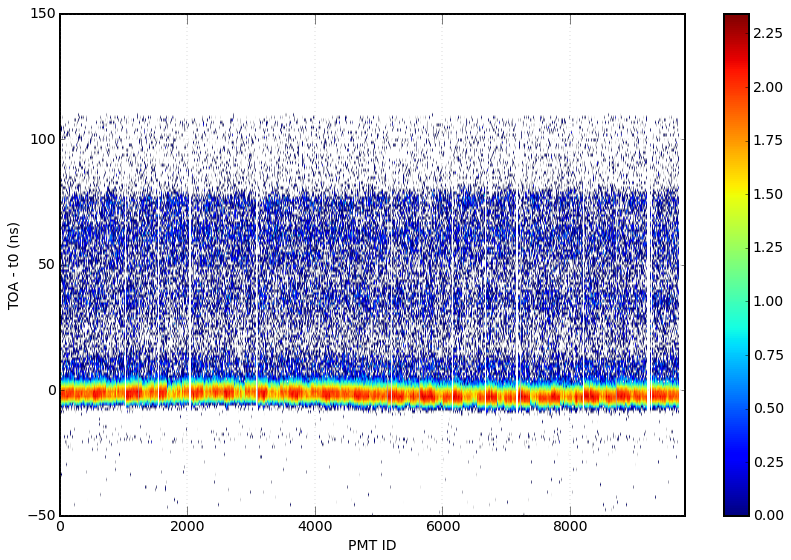

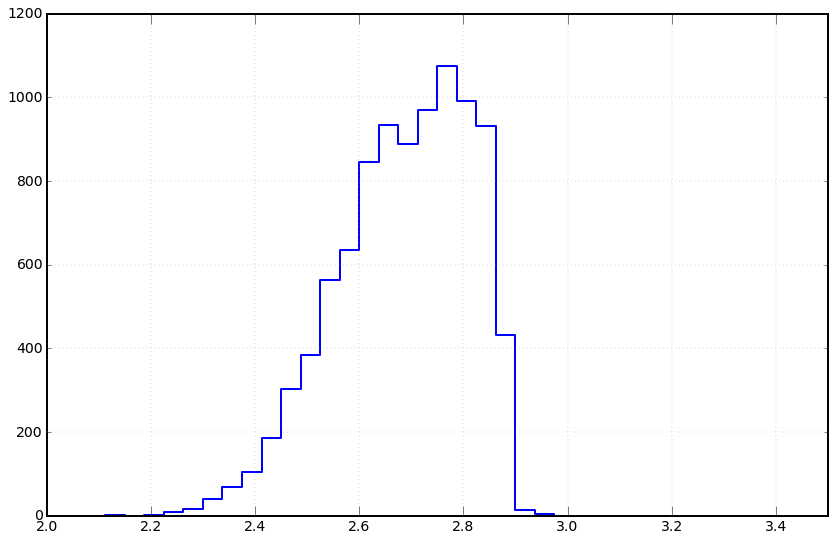

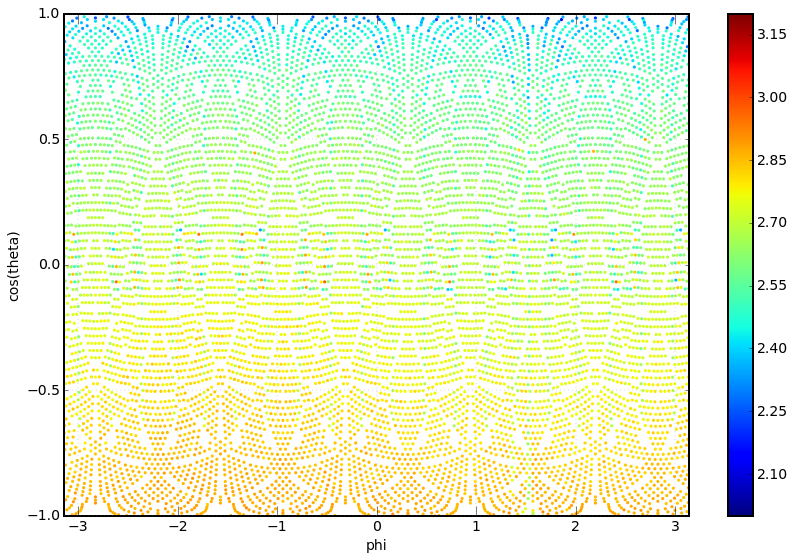

In [209]:
infile = '/home/jpyanez/snoplus/data/snoplus_mc/laserball/run_mc_std/'+run+'_TOA.pckl'
try:
    standard = pickle.load(open(infile))

    print np.sum(standard['toa'])
    fig = plt.figure(figsize=figsize)

    plt.imshow(np.log10(standard['toa'].T), aspect='auto', origin='lower',
              extent=[0, standard['toa'].shape[0], 
                      standard['time_edges'].min()-native_t0, 
                      standard['time_edges'].max()-native_t0])
    plt.ylim([-50, 150])
    plt.xlabel('PMT ID')
    plt.ylabel('TOA - t0 (ns)')
    plt.colorbar()
    
    
    sum_data = np.log10(standard['toa'].sum(axis=1)+1)
    nonzeroa  = (sum_data>0)
    nonzerob  = nonzeroa[:pmt_info['phi'].size]

    fig = plt.figure(figsize=figsize)
    x = np.linspace(2, 3.5, 41)
    b, x = np.histogram(sum_data[nonzeroa], x)
    jplot.unfilledBar(x, b)

    fig = plt.figure(figsize=figsize)

    #ax = fig.add_subplot(111, projection='mollweide')
    plt.scatter(pmt_info['phi'][nonzerob], pmt_info['costheta'][nonzerob], s=10.,
               c = sum_data[nonzeroa],
               edgecolor='',
               vmin = 2., vmax=3.2)
    plt.xlabel('phi')
    plt.ylabel('cos(theta)')
    plt.xlim(-np.pi, np.pi)
    plt.ylim(-1,1)
    plt.colorbar()

    fig.savefig(os.path.join(outdir_base, run + '_hits_native.png'),dpi=200)

except:
    standard = None

63927235.0


/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx2/Compiler/intel2016.4/python27-scipy-stack/2017a/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


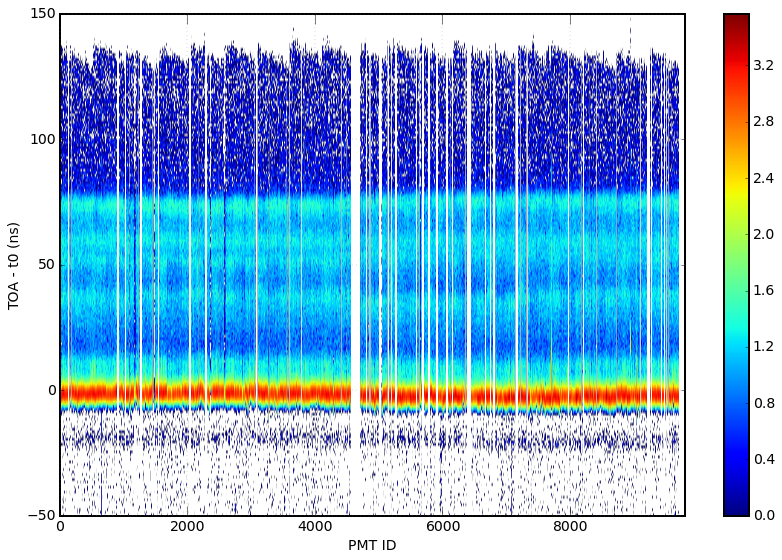

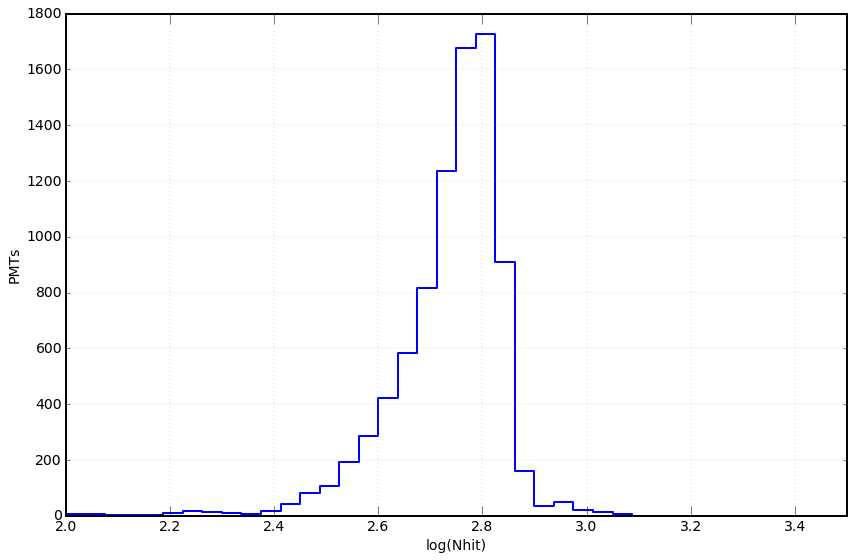

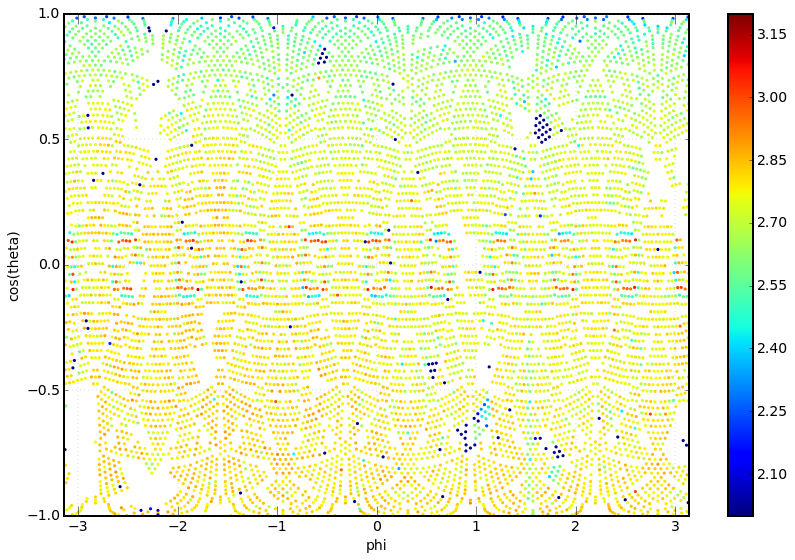

In [210]:
infile = '/home/jpyanez/snoplus/data/snoplus_data/laserball_runs/soc_histograms_simple/'+run+'_TOA.pckl'
data = pickle.load(open(infile))
print np.sum(data['toa'])
fig = plt.figure(figsize=figsize)
data_scale = native['toa'].sum()/data['toa'].sum()


plt.imshow(np.log10(data['toa'].T), aspect='auto', origin='lower',
          extent=[0, data['toa'].shape[0], 
                  data['time_edges'].min()-data_t0, 
                  data['time_edges'].max()-data_t0])
plt.ylim([-50, 150])
plt.xlabel('PMT ID')
plt.ylabel('TOA - t0 (ns)')
plt.colorbar()

sum_data = np.log10(data['toa'].sum(axis=1)*data_scale+1)
nonzeroa  = (sum_data>0)
nonzerob  = nonzeroa[:pmt_info['phi'].size]

fig = plt.figure(figsize=figsize)
x = np.linspace(2, 3.5, 41)
b, x = np.histogram(sum_data[nonzeroa], x)
jplot.unfilledBar(x, b)
plt.xlabel('log(Nhit)')
plt.ylabel('PMTs')

fig = plt.figure(figsize=figsize)

#ax = fig.add_subplot(111, projection='mollweide')
plt.scatter(pmt_info['phi'][nonzerob], pmt_info['costheta'][nonzerob], s=10.,
           c = sum_data[nonzeroa],
           edgecolor='',
           vmin = 2., vmax=3.2)
plt.xlabel('phi')
plt.ylabel('cos(theta)')
plt.xlim(-np.pi, np.pi)
plt.ylim(-1,1)
plt.colorbar()

fig.savefig(os.path.join(outdir_base, run + '_hits_data.png'),dpi=200)


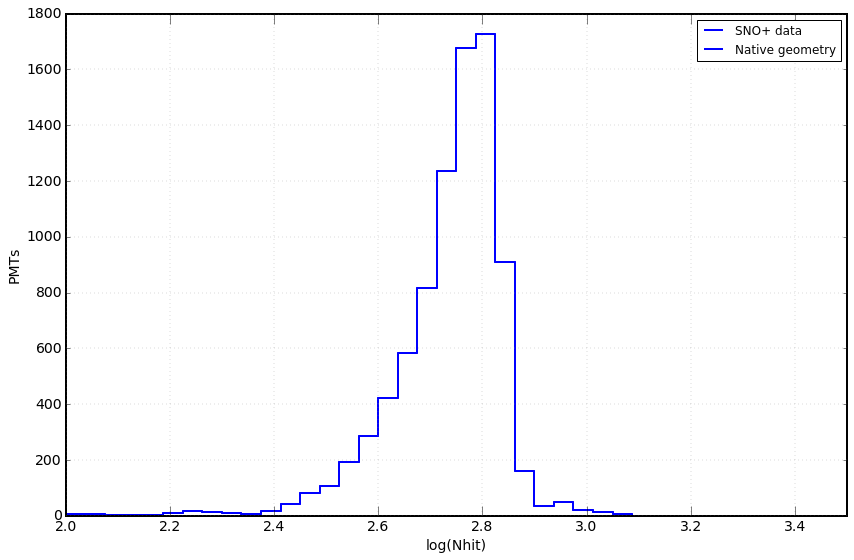

In [211]:
sum_data = np.log10(data['toa'].sum(axis=1)*data_scale+1)
nonzeroa  = (sum_data>0)
nonzerob  = nonzeroa[:pmt_info['phi'].size]

nsum_data = np.log10(native['toa'].sum(axis=1)*data_scale+1)
nnonzeroa  = (nsum_data>0)
nnonzerob  = nonzeroa[:pmt_info['phi'].size]

fig = plt.figure(figsize=figsize)
x = np.linspace(2, 3.5, 41)
b, x = np.histogram(sum_data[nonzeroa], x)
nb, nx = np.histogram(nsum_data[nonzeroa], x)

jplot.unfilledBar(x, b, label='SNO+ data')
jplot.unfilledBar(x, b, label='Native geometry')
plt.legend(loc=0)
plt.xlabel('log(Nhit)')
plt.ylabel('PMTs')

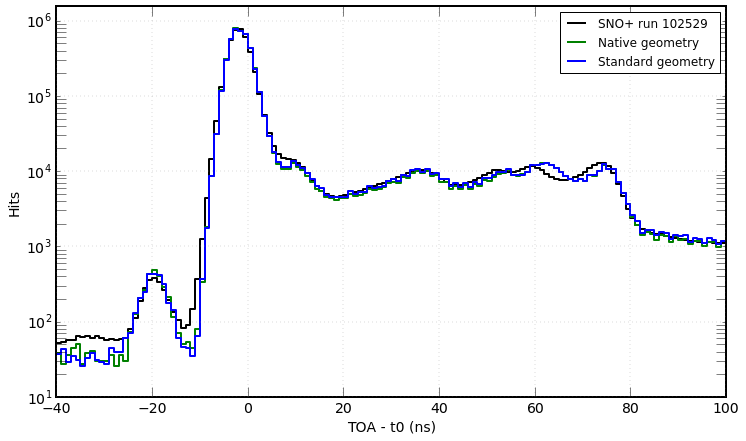

In [212]:
thismax = data['toa'].sum(axis=0).max()*data_scale*2.
thismin = 10

fig = plt.figure(figsize=(12,7))
jplot.unfilledBar(data['time_edges']-data_t0,
                  data_scale*data['toa'].sum(axis=0), 
                  color = 'black',
                 label ='SNO+ run ' + run)
jplot.unfilledBar(native['time_edges']-native_t0,
                  native['toa'].sum(axis=0), 
                  color = 'green',
                 label='Native geometry')
try:
    None
    jplot.unfilledBar(standard['time_edges']-native_t0,
                      standard['toa'].sum(axis=0), 
                      color = 'blue',
                     label='Standard geometry')
except:
    print 'No standard geometry'
plt.yscale('log')
plt.legend(loc=0)
#plt.xlim(-20, 100)
plt.ylabel('Hits')
plt.xlabel('TOA - t0 (ns)')
plt.xlim(-40, 100)
#plt.ylim(2E1, 4E6)
plt.ylim(thismin, thismax)

fig.savefig(os.path.join(outdir_base, run + '_toa_all.png'),dpi=200)


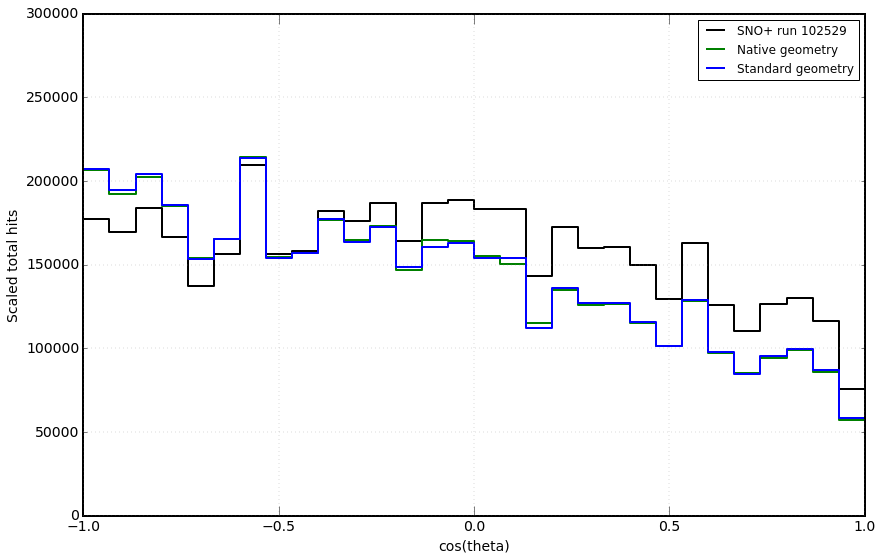

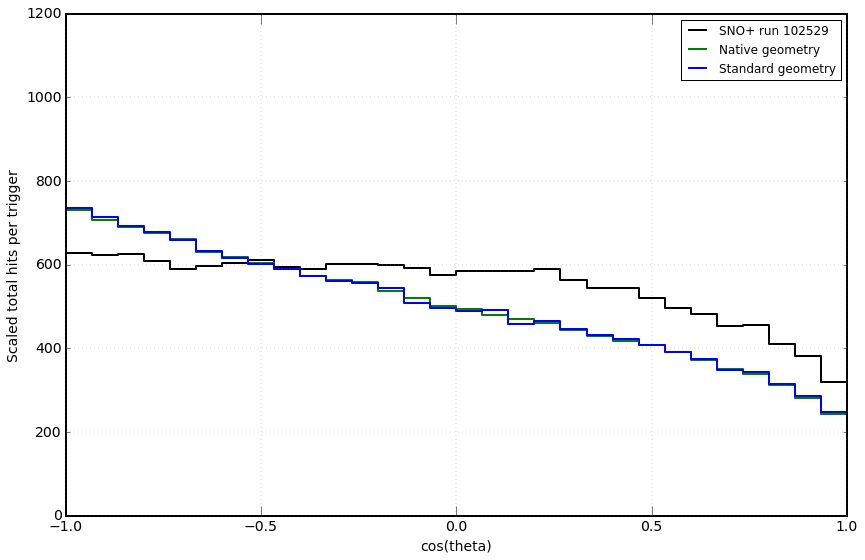

In [213]:
# Occupancy as cos theta (only moving in z axis)



tcost = np.linspace(-1,1, 31)
sum_data = data['toa'].sum(axis=1)


# Get the PMTs in the band
bpmts, x = np.histogram(pmt_info['costheta'][nonzerob], tcost)

# Only look at those PMTs in data that actually have hits
nonzeroa = sum_data>0
nonzerob  = nonzeroa[:pmt_info['phi'].size]
sum_data = sum_data[nonzeroa]

sum_native=native['toa'].sum(axis=1)[nonzeroa]

bdata,x = np.histogram(pmt_info['costheta'][nonzerob], tcost,
                   weights=sum_data)

bnative,x = np.histogram(pmt_info['costheta'][nonzerob], tcost,
                   weights=sum_native)

fig = plt.figure(figsize=figsize)
jplot.unfilledBar(x,bdata*data_scale, color='k', 
                                       label ='SNO+ run ' + run)
jplot.unfilledBar(x,bnative, color='g', label='Native geometry')
try:
    sum_std  = standard['toa'].sum(axis=1)[nonzeroa]
    bstd,x = np.histogram(pmt_info['costheta'][nonzerob], tcost,
                       weights=sum_std)
    jplot.unfilledBar(x,bstd, color='b', label='Standard geometry')
except:
    print 'No standard geometry'
plt.legend(loc=0)
plt.ylim(0,bnative.max()*1.4)
plt.xlabel('cos(theta)')
plt.ylabel('Scaled total hits')
fig.savefig(os.path.join(outdir_base, run + '_hits_comparison.png'),dpi=200)

fig = plt.figure(figsize=figsize)
jplot.unfilledBar(x,bdata*data_scale/bpmts, color='k', 
                                       label ='SNO+ run ' + run)
jplot.unfilledBar(x,bnative/bpmts, color='g', label='Native geometry')
try:
    sum_std  = standard['toa'].sum(axis=1)[nonzeroa]
    bstd,x = np.histogram(pmt_info['costheta'][nonzerob], tcost,
                       weights=sum_std)
    jplot.unfilledBar(x,bstd/bpmts, color='b', label='Standard geometry')
except:
    print 'No standard geometry'
plt.legend(loc=0)
plt.ylim(0,1200)
plt.xlabel('cos(theta)')
plt.ylabel('Scaled total hits per trigger')
fig.savefig(os.path.join(outdir_base, run + '_hits_comparison2.png'),dpi=200)



In [214]:
triggers

264536

1.0 0.939692620786


/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx2/Compiler/intel2016.4/python27-scipy-stack/2017a/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9800 but corresponding boolean dimension is 9728
/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx2/Compiler/intel2016.4/python27-scipy-stack/2017a/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9800 but corresponding boolean dimension is 9728
/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx2/Compiler/intel2016.4/python27-scipy-stack/2017a/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9800 but corresponding boolean dimension is 9728
/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx2/Compiler/int

0.939692620786 0.766044443119
0.766044443119 0.5
0.5 0.173648177667
0.173648177667 -0.173648177667
-0.173648177667 -0.5
-0.5 -0.766044443119
-0.766044443119 -0.939692620786


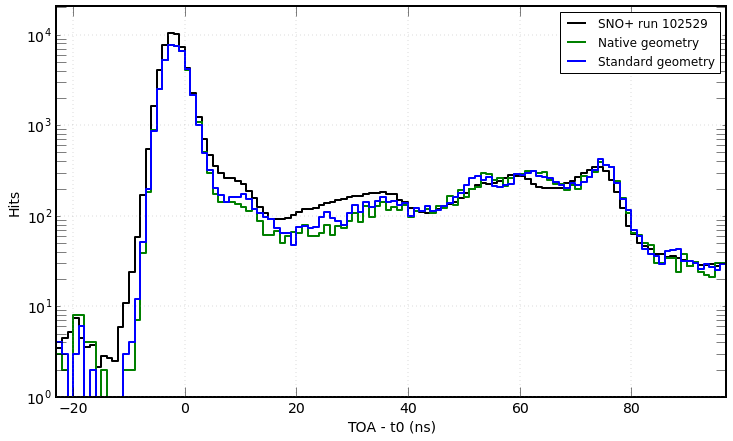

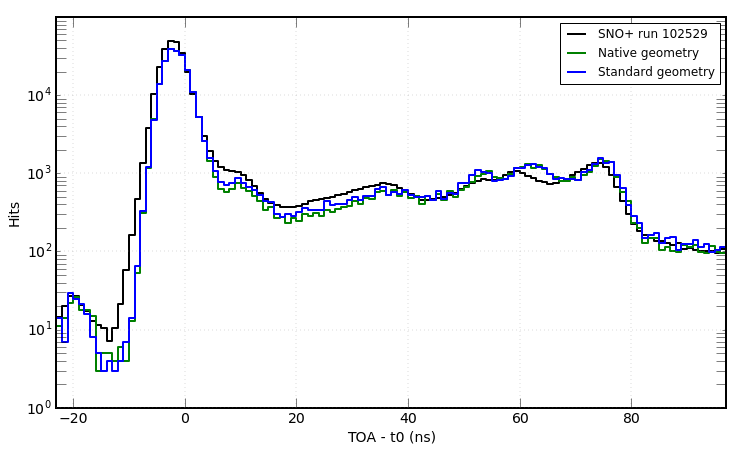

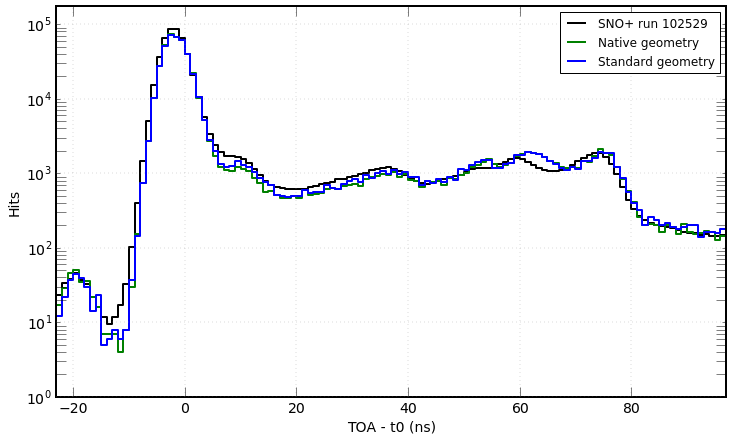

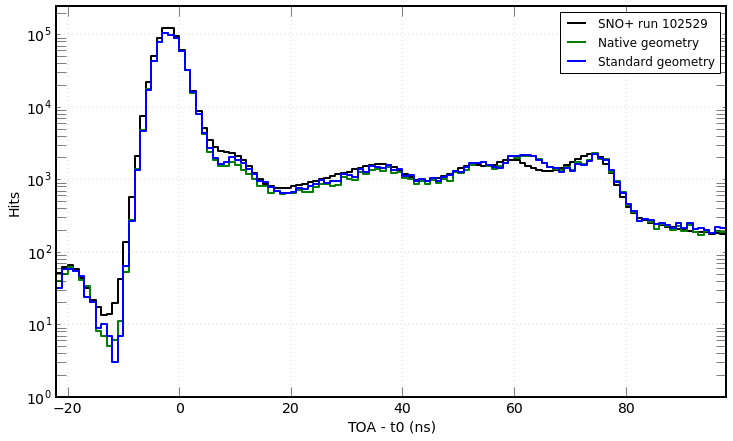

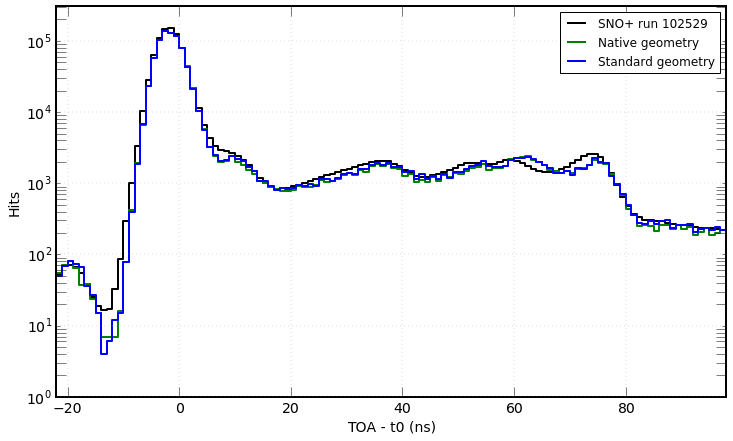

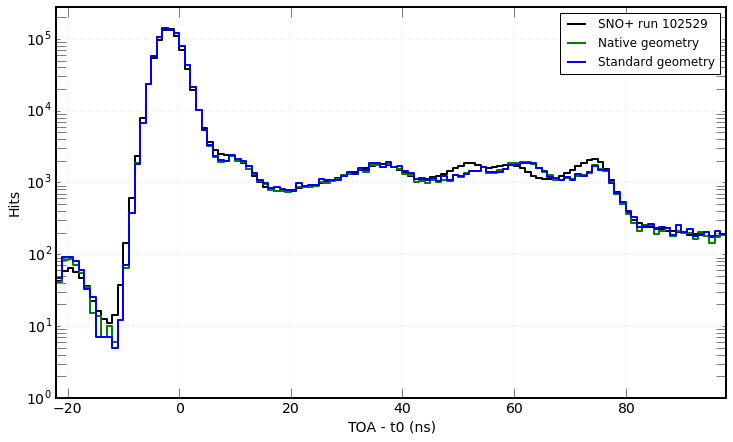

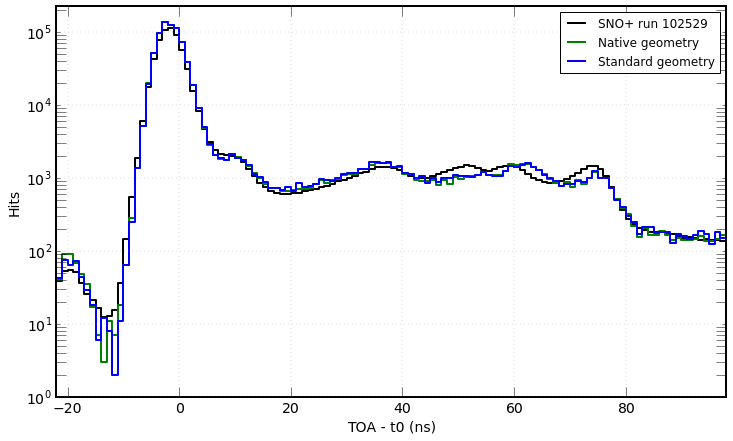

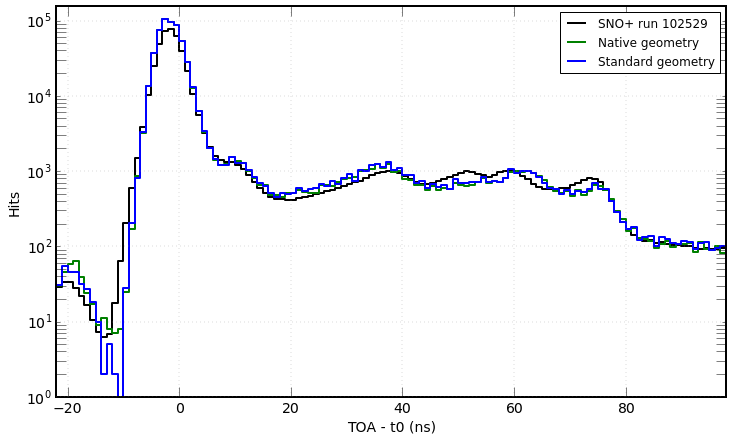

In [215]:
# Select only rings in theta (NOT cos theta)
ring_width = 20. # In degrees
nrings = int(180/ring_width)
for i in range(nrings-1):
    range_high = np.cos(np.deg2rad(i*ring_width))
    range_low = np.cos(np.deg2rad((i+1)*ring_width))
    print range_high, range_low
    range_bool = (pmt_info['costheta']>range_low)*(pmt_info['costheta']<range_high)

    fig = plt.figure(figsize=(12,7))
    jplot.unfilledBar(data['time_edges']-data_t0,
                      data_scale*data['toa'][range_bool,:].sum(axis=0), 
                      color = 'black',
                     label ='SNO+ run ' + run)
    jplot.unfilledBar(native['time_edges']-native_t0,
                      native['toa'][range_bool,:].sum(axis=0), 
                      color = 'green',
                     label='Native geometry')
    try:
        jplot.unfilledBar(standard['time_edges']-native_t0,
                          standard['toa'][range_bool,:].sum(axis=0), 
                          color = 'blue',
                         label='Standard geometry')
    except:
        print 'No standard geometry'
    
    all_t0 = data['time_edges'][data['toa'][range_bool,:].sum(axis=0).argmax()]-data_t0
    thismax = data['toa'][range_bool,:].sum(axis=0).max()*data_scale*2.
    thismin = 1
    
    plt.yscale('log')
    plt.legend(loc=0)
    #plt.xlim(-20, 100)
    plt.ylabel('Hits')
    plt.xlabel('TOA - t0 (ns)')
    plt.xlim(all_t0-20, all_t0 +100)
    plt.ylim(thismin, thismax)    
    fig.savefig(os.path.join(outdir_base, run + '_toa_'+ "%0.2f" % range_low + '_'+"%0.2f" % range_high + '.png'),
                dpi=200)
    